# Matplotlib基本操作和邊緣檢測

## 圖像讀取&顯示

[INFO] Image shape:  (616, 926, 3)


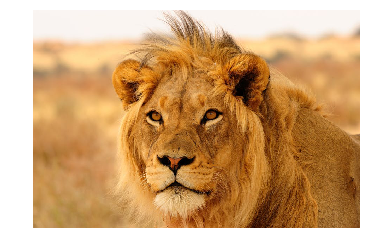

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt 

# 讀取圖檔
image = plt.imread("images\lion.jpg")
# 印出影像的維度
print("[INFO] Image shape: ", image.shape)
# 設定要顯式的圖檔和它的色彩
plt.imshow(image)
# 關閉XY軸座標
plt.axis("off")
# 顯示圖片
plt.show()

## 圖像儲存&顯示

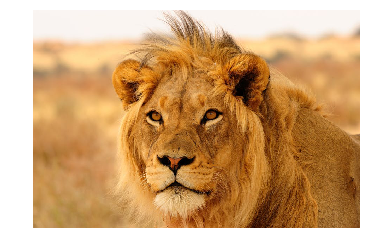

In [14]:
from matplotlib import pyplot as plt 

# 讀取圖檔
image = plt.imread("images\lion.jpg")
# 設定要顯式的圖檔和它的色彩
plt.imshow(image)
# 關閉XY軸座標
plt.axis("off")
# 儲存圖像，savefig()須放於show()前面，不須要指定變數名稱
plt.savefig("images\\lion_output.jpg")
# 顯示圖片
plt.show()

## 多個邊緣檢測

### *1.* 2x2顯示兩個視窗

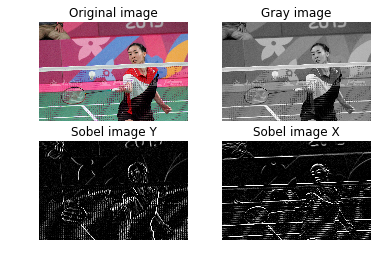

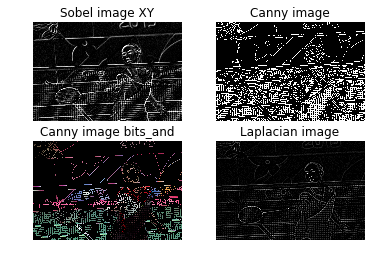

In [19]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# 讀取原始圖檔
original_image = cv2.imread("images\\badminton.jpg")


# 將圖檔從BGR格式(opencv)轉換成RGB格式(matplotlib)
image1 = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
# 設定檔案位置，plt.subplot(221) = plt.subplot(2,2,1)，第一個數字是行(直)，第二個是列(橫)，第三個是子圖的索引
plt.subplot(221)
# 關閉XY軸的座標
plt.axis("off")
# 圖案的標題
plt.title("Original image")
# 設定要顯式的圖檔和它的色彩
plt.imshow(image1)


# 深拷貝圖像
image2 = np.array(original_image)
# 從BGR格式轉換成灰階格式
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.subplot(222)
plt.axis("off")
plt.title("Gray image")
# 圖檔需要先轉灰階，cmap='gray'才能生效
plt.imshow(image2, cmap='gray')


image3 = np.array(original_image)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
# 重設圖案大小(無此行會影響圖像在matplotlib的清晰度)
image3 = cv2.resize(image3, (450,300))
# Sobel邊緣檢測，cv2.Sobel(圖像變數, cv2.CV_8U(輸出圖像深度), 1,0(1,0代表Y軸計算，0,1代表X軸計算))，參考：http://monkeycoding.com/?p=53、https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d
sobel_y = cv2.Sobel(image3, cv2.CV_8U, 1,0)
plt.subplot(223)
plt.axis("off")
plt.title("Sobel image Y")
plt.imshow(sobel_y, cmap='gray')


image4 = np.array(original_image)
# 將BGR格式(opencv)轉換成RGB格式(matplotlib)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
# 重設圖案大小(無此行會影響圖像在matplotlib的顯示)
image4 = cv2.resize(image4, (450,300))
# Sobel邊緣檢測，如果是cv2.CV_16S而不是cv2.CV_8U會出現以下的錯誤：
# Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
sobel_x = cv2.Sobel(image4, cv2.CV_8U, 0,1)
plt.subplot(224)
plt.axis("off")
plt.title("Sobel image X")
plt.imshow(sobel_x, cmap='gray')
# 顯示第一個2x2的視窗
plt.figure()


image5 = np.array(original_image)
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)
image5 = cv2.resize(image5, (450,300))
x = cv2.Sobel(image5, cv2.CV_8U, 1,0)
y = cv2.Sobel(image5, cv2.CV_8U, 0,1)
# 將兩個圖案重疊並設定圖檔的權重，cv2.addWeighted(x,0.7(x的權重), y,0.7(y的權重) ,0(圖案相加後再增加的值))
xy_add = cv2.addWeighted(x,0.7, y,0.7 ,0)
plt.subplot(221)
plt.axis("off")
plt.title("Sobel image XY")
plt.imshow(xy_add, cmap='gray')


image6 = np.array(original_image)
image6 = cv2.cvtColor(image6, cv2.COLOR_BGR2GRAY)
image6 = cv2.resize(image6, (450,300))
# cv2.blur(image6, (5,5))，5,5代表5x5的矩陣大小
image6 = cv2.blur(image6, (5,5))
# Canny邊緣檢測
canny = cv2.Canny(image6, 3,15)
plt.subplot(222)
plt.axis("off")
plt.title("Canny image")
plt.imshow(canny, cmap='gray')


image7 = np.array(original_image)
image7 = cv2.cvtColor(image7, cv2.COLOR_BGR2RGB)
image7 = cv2.resize(image7, (450,300))
# 高斯模糊，cv2.GaussianBlur(image7, (3,3), 0)，3,3代表3x3的矩陣大小，0,0為sigmaX、sigmaY，參考：http://monkeycoding.com/?p=570
gassian_blur = cv2.GaussianBlur(image7, (3,3), 0,0)
canny_xy2 = cv2.Canny(gassian_blur, 50,150)
# 對圖像的每個像素進行and的位元運算；image7為高斯模糊的圖檔；mask為取出的邊緣線條，參考：https://blog.csdn.net/u011028345/article/details/77278467
canny_xy2 = cv2.bitwise_and(image7, image7, mask=canny_xy2)
plt.subplot(223)
plt.axis("off")
plt.title("Canny image bits_and")
plt.imshow(canny_xy2)


image8 = np.array(original_image)
image8 = cv2.cvtColor(image8, cv2.COLOR_BGR2GRAY)
image8 = cv2.resize(image8, (450,300))
image8 = cv2.GaussianBlur(image8, (5,5), 0)
# Laplacian邊緣檢測，抓取線條
laplacian = cv2.Laplacian(image8, cv2.CV_16U)
plt.subplot(224)
plt.axis("off")
plt.title("Laplacian image")
plt.imshow(laplacian, cmap='gray')

# 顯示第二個2x2的視窗
plt.show()

### *2.* 3x3顯示

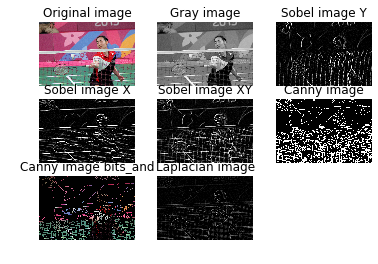

In [20]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# 讀取原始圖檔
original_image = cv2.imread("images\\badminton.jpg")


# 將圖檔從BGR格式(opencv)轉換成RGB格式(matplotlib)
image1 = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
# 設定檔案位置，plt.subplot(331) = plt.subplot(3,3,1)，第一個數字是行(直)，第二個是列(橫)，第三個是子圖的索引
plt.subplot(331)
# 關閉XY軸的座標
plt.axis("off")
# 圖案的標題
plt.title("Original image")
# 設定要顯式的圖檔和它的色彩
plt.imshow(image1)


# 深拷貝圖像
image2 = np.array(original_image)
# 從BGR格式轉換成灰階格式
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.subplot(332)
plt.axis("off")
plt.title("Gray image")
# 圖檔需要先轉灰階，cmap='gray'才能生效
plt.imshow(image2, cmap='gray')


image3 = np.array(original_image)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
# 重設圖案大小(無此行會影響圖像在matplotlib的清晰度)
image3 = cv2.resize(image3, (450,300))
# Sobel邊緣檢測，cv2.Sobel(圖像變數, cv2.CV_8U(輸出圖像深度), 1,0(1,0代表Y軸計算，0,1代表X軸計算))，參考：http://monkeycoding.com/?p=53、https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d
sobel_y = cv2.Sobel(image3, cv2.CV_8U, 1,0)
plt.subplot(333)
plt.axis("off")
plt.title("Sobel image Y")
plt.imshow(sobel_y, cmap='gray')


image4 = np.array(original_image)
# 將BGR格式(opencv)轉換成RGB格式(matplotlib)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
# 重設圖案大小(無此行會影響圖像在matplotlib的顯示)
image4 = cv2.resize(image4, (450,300))
# Sobel邊緣檢測，如果是cv2.CV_16S而不是cv2.CV_8U會出現以下的錯誤：
# Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
sobel_x = cv2.Sobel(image4, cv2.CV_8U, 0,1)
plt.subplot(334)
plt.axis("off")
plt.title("Sobel image X")
plt.imshow(sobel_x, cmap='gray')


image5 = np.array(original_image)
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)
image5 = cv2.resize(image5, (450,300))
x = cv2.Sobel(image5, cv2.CV_8U, 1,0)
y = cv2.Sobel(image5, cv2.CV_8U, 0,1)
# 將兩個圖案重疊並設定圖檔的權重，cv2.addWeighted(x,0.7(x的權重), y,0.7(y的權重) ,0(圖案相加後再增加的值))
xy_add = cv2.addWeighted(x,0.7, y,0.7 ,0)
plt.subplot(335)
plt.axis("off")
plt.title("Sobel image XY")
plt.imshow(xy_add, cmap='gray')


image6 = np.array(original_image)
image6 = cv2.cvtColor(image6, cv2.COLOR_BGR2GRAY)
image6 = cv2.resize(image6, (450,300))
# cv2.blur(image6, (5,5))，5,5代表5x5的矩陣大小
image6 = cv2.blur(image6, (5,5))
# Canny邊緣檢測
canny = cv2.Canny(image6, 3,15)
plt.subplot(336)
plt.axis("off")
plt.title("Canny image")
plt.imshow(canny, cmap='gray')


image7 = np.array(original_image)
image7 = cv2.cvtColor(image7, cv2.COLOR_BGR2RGB)
image7 = cv2.resize(image7, (450,300))
# 高斯模糊，cv2.GaussianBlur(image7, (3,3), 0)，3,3代表3x3的矩陣大小，0,0為sigmaX、sigmaY，參考：http://monkeycoding.com/?p=570
gassian_blur = cv2.GaussianBlur(image7, (3,3), 0,0)
canny_xy2 = cv2.Canny(gassian_blur, 50,150)
# 對圖像的每個像素進行and的位元運算；image7為高斯模糊的圖檔；mask為取出的邊緣線條，參考：https://blog.csdn.net/u011028345/article/details/77278467
canny_xy2 = cv2.bitwise_and(image7, image7, mask=canny_xy2)
plt.subplot(337)
plt.axis("off")
plt.title("Canny image bits_and")
plt.imshow(canny_xy2)


image8 = np.array(original_image)
image8 = cv2.cvtColor(image8, cv2.COLOR_BGR2GRAY)
image8 = cv2.resize(image8, (450,300))
image8 = cv2.GaussianBlur(image8, (5,5), 0)
# Laplacian邊緣檢測，抓取線條
laplacian = cv2.Laplacian(image8, cv2.CV_16U)
plt.subplot(338)
plt.axis("off")
plt.title("Laplacian image")
plt.imshow(laplacian, cmap='gray')

# 顯示3x3的視窗
plt.show()

### *3.* 獨立顯示8個視窗

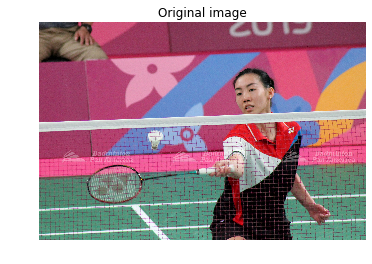

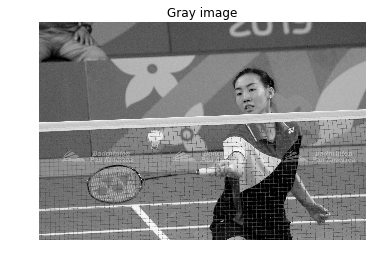

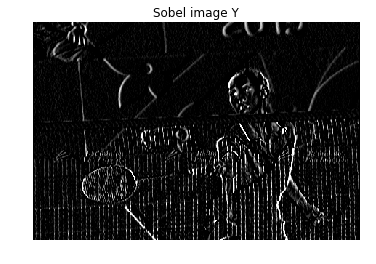

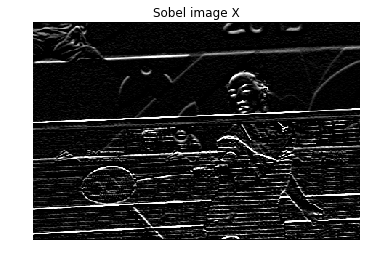

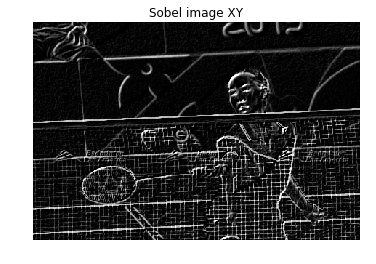

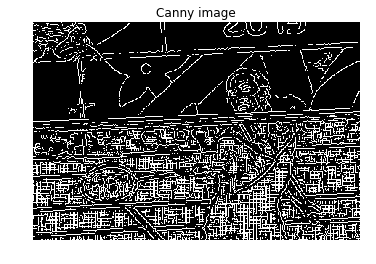

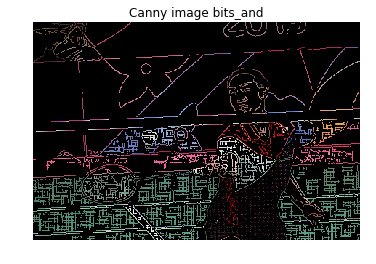

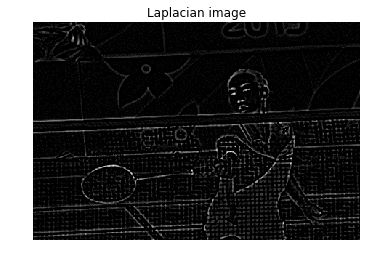

In [21]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# 讀取原始圖檔
original_image = cv2.imread("images\\badminton.jpg")


# 將圖檔從BGR格式(opencv)轉換成RGB格式(matplotlib)
image1 = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
# 關閉XY軸的座標
plt.axis("off")
# 圖案的標題
plt.title("Original image")
# 設定要顯式的圖檔和它的色彩
plt.imshow(image1)
# 顯示單獨的視窗
plt.figure()


# 深拷貝圖像
image2 = np.array(original_image)
# 從BGR格式轉換成灰階格式
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.title("Gray image")
# 圖檔需要先轉灰階，cmap='gray'才能生效
plt.imshow(image2, cmap='gray')
plt.figure()


image3 = np.array(original_image)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
# 重設圖案大小(無此行會影響圖像在matplotlib的清晰度)
image3 = cv2.resize(image3, (450,300))
# Sobel邊緣檢測，cv2.Sobel(圖像變數, cv2.CV_8U(輸出圖像深度), 1,0(1,0代表Y軸計算，0,1代表X軸計算))，參考：http://monkeycoding.com/?p=53、https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d
sobel_y = cv2.Sobel(image3, cv2.CV_8U, 1,0)
plt.axis("off")
plt.title("Sobel image Y")
plt.imshow(sobel_y, cmap='gray')
# 參考：https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure()


image4 = np.array(original_image)
# 將BGR格式(opencv)轉換成RGB格式(matplotlib)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
# 重設圖案大小(無此行會影響圖像在matplotlib的顯示)
image4 = cv2.resize(image4, (450,300))
# Sobel邊緣檢測，如果是cv2.CV_16S而不是cv2.CV_8U會出現以下的錯誤：
# Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
sobel_x = cv2.Sobel(image4, cv2.CV_8U, 0,1)
plt.axis("off")
plt.title("Sobel image X")
plt.imshow(sobel_x, cmap='gray')
# 顯示第一個2x2的視窗
plt.figure()


image5 = np.array(original_image)
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)
image5 = cv2.resize(image5, (450,300))
x = cv2.Sobel(image5, cv2.CV_8U, 1,0)
y = cv2.Sobel(image5, cv2.CV_8U, 0,1)
# 將兩個圖案重疊並設定圖檔的權重，cv2.addWeighted(x,0.7(x的權重), y,0.7(y的權重) ,0(圖案相加後再增加的值))
xy_add = cv2.addWeighted(x,0.7, y,0.7 ,0)
plt.axis("off")
plt.title("Sobel image XY")
plt.imshow(xy_add, cmap='gray')
plt.figure()


image6 = np.array(original_image)
image6 = cv2.cvtColor(image6, cv2.COLOR_BGR2GRAY)
image6 = cv2.resize(image6, (450,300))
# cv2.blur(image6, (5,5))，5,5代表5x5的矩陣大小
image6 = cv2.blur(image6, (5,5))
# Canny邊緣檢測
canny = cv2.Canny(image6, 3,15)
plt.axis("off")
plt.title("Canny image")
plt.imshow(canny, cmap='gray')
plt.figure()


image7 = np.array(original_image)
image7 = cv2.cvtColor(image7, cv2.COLOR_BGR2RGB)
image7 = cv2.resize(image7, (450,300))
# 高斯模糊，cv2.GaussianBlur(image7, (3,3), 0)，3,3代表3x3的矩陣大小，0,0為sigmaX、sigmaY，參考：http://monkeycoding.com/?p=570
gassian_blur = cv2.GaussianBlur(image7, (3,3), 0,0)
canny_xy2 = cv2.Canny(gassian_blur, 50,150)
# 對圖像的每個像素進行and的位元運算；image7為高斯模糊的圖檔；mask為取出的邊緣線條，參考：https://blog.csdn.net/u011028345/article/details/77278467
canny_xy2 = cv2.bitwise_and(image7, image7, mask=canny_xy2)
plt.axis("off")
plt.title("Canny image bits_and")
plt.imshow(canny_xy2)
plt.figure()


image8 = np.array(original_image)
image8 = cv2.cvtColor(image8, cv2.COLOR_BGR2GRAY)
image8 = cv2.resize(image8, (450,300))
image8 = cv2.GaussianBlur(image8, (5,5), 0)
# Laplacian邊緣檢測，抓取線條
laplacian = cv2.Laplacian(image8, cv2.CV_16U)
plt.axis("off")
plt.title("Laplacian image")
plt.imshow(laplacian, cmap='gray')


# 顯示8個視窗
plt.show()

### 4.獨立顯示8個視窗(放大)

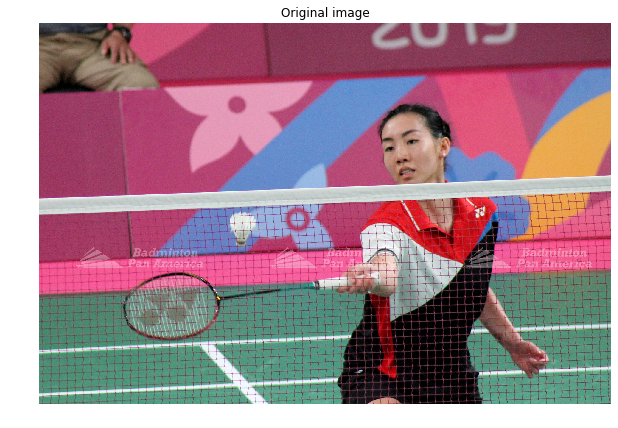

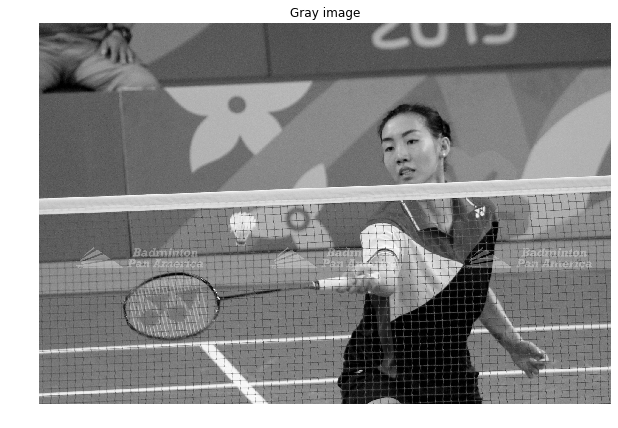

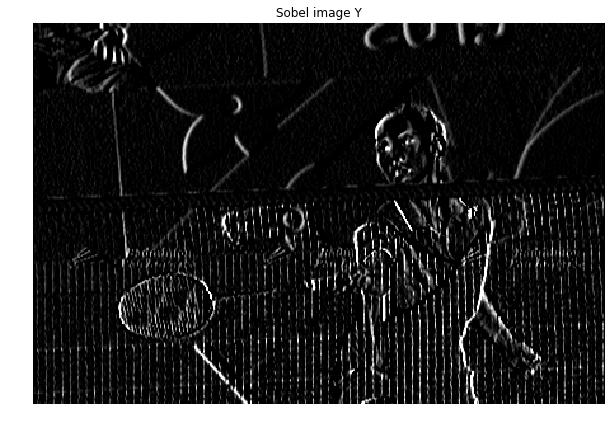

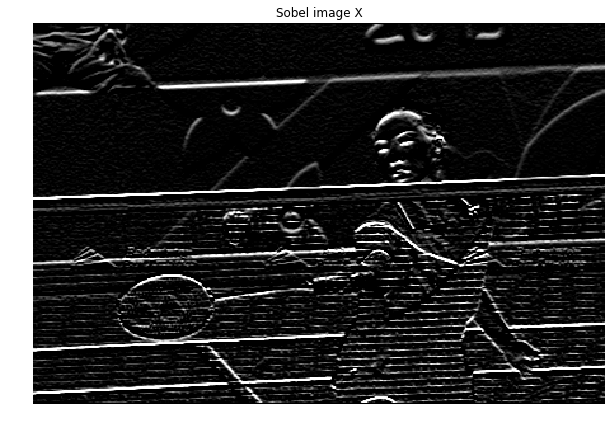

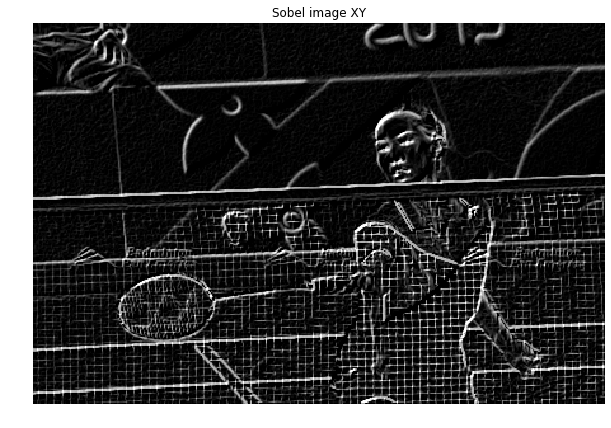

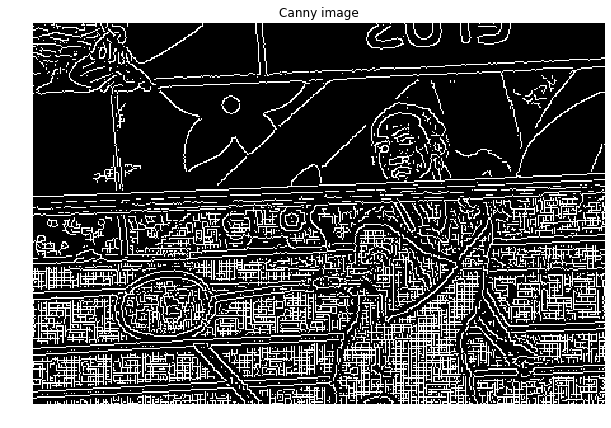

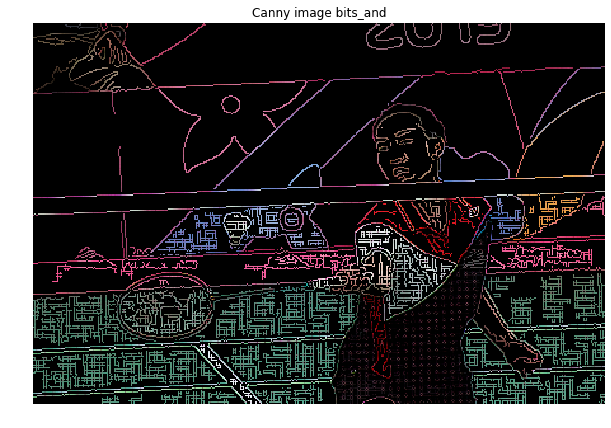

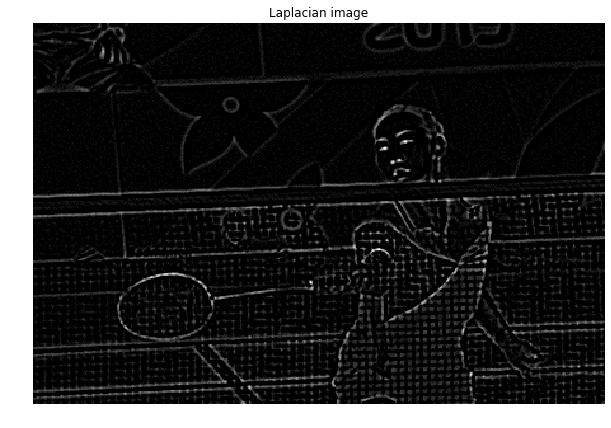

In [23]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# 讀取原始圖檔
original_image = cv2.imread("images\\badminton.jpg")

# 顯示單獨的視窗，並設定寬10.24英吋，高7.68英吋
plt.figure(figsize=[10.24,7.68])
# 將圖檔從BGR格式(opencv)轉換成RGB格式(matplotlib)
image1 = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
# 關閉XY軸的座標
plt.axis("off")
# 圖案的標題
plt.title("Original image")
# 設定要顯式的圖檔和它的色彩
plt.imshow(image1)
plt.figure(figsize=[10.24,7.68])


# 深拷貝圖像
image2 = np.array(original_image)
# 從BGR格式轉換成灰階格式
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.title("Gray image")
# 圖檔需要先轉灰階，cmap='gray'才能生效
plt.imshow(image2, cmap='gray')
plt.figure(figsize=[10.24,7.68])


image3 = np.array(original_image)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
# 重設圖案大小(無此行會影響圖像在matplotlib的清晰度)
image3 = cv2.resize(image3, (450,300))
# Sobel邊緣檢測，cv2.Sobel(圖像變數, cv2.CV_8U(輸出圖像深度), 1,0(1,0代表Y軸計算，0,1代表X軸計算))，參考：http://monkeycoding.com/?p=53、https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d
sobel_y = cv2.Sobel(image3, cv2.CV_8U, 1,0)
plt.axis("off")
plt.title("Sobel image Y")
plt.imshow(sobel_y, cmap='gray')
plt.figure(figsize=[10.24,7.68])


image4 = np.array(original_image)
# 將BGR格式(opencv)轉換成RGB格式(matplotlib)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
# 重設圖案大小(無此行會影響圖像在matplotlib的顯示)
image4 = cv2.resize(image4, (450,300))
# Sobel邊緣檢測，如果是cv2.CV_16S而不是cv2.CV_8U會出現以下的錯誤：
# Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
sobel_x = cv2.Sobel(image4, cv2.CV_8U, 0,1)
plt.axis("off")
plt.title("Sobel image X")
plt.imshow(sobel_x, cmap='gray')
# 顯示第一個2x2的視窗
plt.figure(figsize=[10.24,7.68])


image5 = np.array(original_image)
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)
image5 = cv2.resize(image5, (450,300))
x = cv2.Sobel(image5, cv2.CV_8U, 1,0)
y = cv2.Sobel(image5, cv2.CV_8U, 0,1)
# 將兩個圖案重疊並設定圖檔的權重，cv2.addWeighted(x,0.7(x的權重), y,0.7(y的權重) ,0(圖案相加後再增加的值))
xy_add = cv2.addWeighted(x,0.7, y,0.7 ,0)
plt.axis("off")
plt.title("Sobel image XY")
plt.imshow(xy_add, cmap='gray')
plt.figure(figsize=[10.24,7.68])


image6 = np.array(original_image)
image6 = cv2.cvtColor(image6, cv2.COLOR_BGR2GRAY)
image6 = cv2.resize(image6, (450,300))
# cv2.blur(image6, (5,5))，5,5代表5x5的矩陣大小
image6 = cv2.blur(image6, (5,5))
# Canny邊緣檢測
canny = cv2.Canny(image6, 3,15)
plt.axis("off")
plt.title("Canny image")
plt.imshow(canny, cmap='gray')
plt.figure(figsize=[10.24,7.68])


image7 = np.array(original_image)
image7 = cv2.cvtColor(image7, cv2.COLOR_BGR2RGB)
image7 = cv2.resize(image7, (450,300))
# 高斯模糊，cv2.GaussianBlur(image7, (3,3), 0)，3,3代表3x3的矩陣大小，0,0為sigmaX、sigmaY，參考：http://monkeycoding.com/?p=570
gassian_blur = cv2.GaussianBlur(image7, (3,3), 0,0)
canny_xy2 = cv2.Canny(gassian_blur, 50,150)
# 對圖像的每個像素進行and的位元運算；image7為高斯模糊的圖檔；mask為取出的邊緣線條，參考：https://blog.csdn.net/u011028345/article/details/77278467
canny_xy2 = cv2.bitwise_and(image7, image7, mask=canny_xy2)
plt.axis("off")
plt.title("Canny image bits_and")
plt.imshow(canny_xy2)
plt.figure(figsize=[10.24,7.68])


image8 = np.array(original_image)
image8 = cv2.cvtColor(image8, cv2.COLOR_BGR2GRAY)
image8 = cv2.resize(image8, (450,300))
image8 = cv2.GaussianBlur(image8, (5,5), 0)
# Laplacian邊緣檢測，抓取線條
laplacian = cv2.Laplacian(image8, cv2.CV_16U)
plt.axis("off")
plt.title("Laplacian image")
plt.imshow(laplacian, cmap='gray')


# 顯示8個視窗
plt.show()